<a href="https://colab.research.google.com/github/Saicharan-007/Linear-Regression-From-Scratch/blob/main/Linear_Regression%20Assumptions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt

In [79]:
data=pd.read_csv('Advertising.csv',index_col='Unnamed: 0')

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [81]:
data

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [82]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


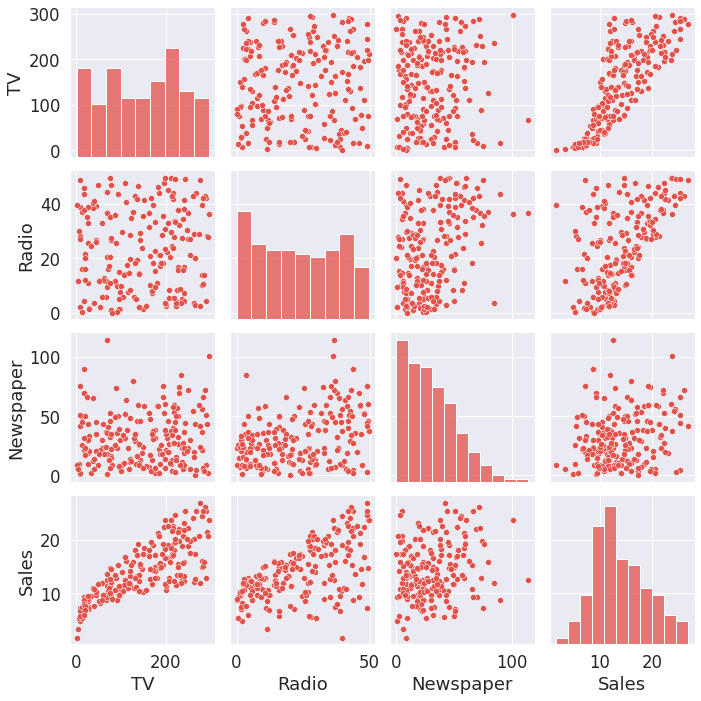

In [83]:
p=sns.pairplot(data)

1) Linearity

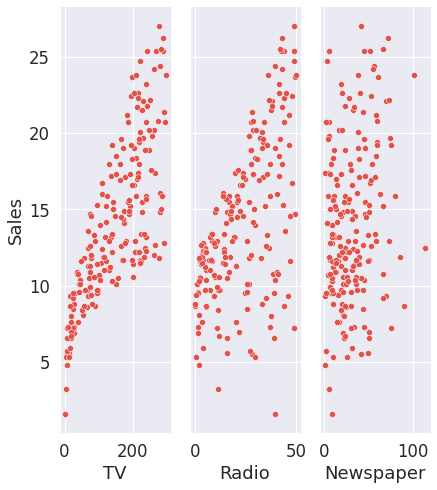

In [84]:
p=sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',size=7,aspect=0.3)
               

In [118]:
x=data.drop(['Sales'],axis=1)
y=data['Sales']

In [119]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [120]:

def train_test_split_(*arrays, test_size=None, train_size=None, random_state=None):
    length = len(arrays[0])
    if random_state:
        np.random.seed(random_state)
    p = np.random.permutation(length)

    if type(test_size) == int:
        index = length - test_size
    elif type(test_size) == float:
        index = length - np.ceil(length * test_size)
    else:
        if type(train_size) == int:
            index = train_size
        elif type(train_size) == float:
            index = int(length * train_size)
        else:
            index = length - np.ceil(length * 0.25)

    return [b for a in arrays for b in (a[p][:index], a[p][index:])]

In [121]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [124]:
y_train

72     12.4
125    19.7
185    17.6
98     15.5
150    10.1
       ... 
68     13.4
193     5.9
118     9.4
48     23.2
173     7.6
Name: Sales, Length: 150, dtype: float64

In [129]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_train)
y_pred

array([10.62420524, 19.5419182 , 18.37463236, 15.26284415, 10.02487307,
        8.17260763, 21.50975323, 14.14823568, 16.30996795,  8.85509348,
       15.23153021, 12.32242242, 13.64852005, 14.17607882, 18.40185911,
       19.24193422, 20.24381109, 17.44505298,  9.24109062, 11.75336116,
       19.79642606,  9.80950414, 20.80042258, 23.32343742, 10.13147045,
       17.3137333 , 19.53122711, 18.50680928, 16.84593627, 18.57944535,
       17.06456086,  8.86557659,  9.96958118,  5.33193027,  3.58046283,
       16.57691776, 12.86700495, 18.07899796, 11.79508257, 12.56748077,
       13.73208519,  6.99405932, 16.59518043,  9.77789051,  8.03719883,
       15.5975553 , 24.90100375, 11.03711104, 21.32059879, 13.71934146,
       10.80505837,  8.38304304, 12.37334698, 20.65712246, 10.4343308 ,
       14.56194942, 16.45430324, 17.23321262, 13.08271843, 17.40102398,
       21.23485322,  8.21816066, 16.128531  , 15.1627911 ,  8.7191981 ,
       13.85893495, 16.36845815,  9.50205237, 14.38866714, 18.11

In [130]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.9072183330817297


2) Mean of Residuals

In [131]:
residuals=y_train.values-y_pred
residuals

array([ 1.77579476e+00,  1.58081796e-01, -7.74632362e-01,  2.37155850e-01,
        7.51269282e-02,  1.52739237e+00, -1.09753231e-01,  2.51764320e-01,
        2.90032053e-01, -3.35509348e+00, -2.53153021e+00, -6.22422425e-01,
       -1.44852005e+00,  4.23921176e-01,  5.98140891e-01,  1.58065779e-01,
       -4.38110864e-02,  5.54947020e-01,  1.45890938e+00,  2.46638839e-01,
        9.03573938e-01,  1.39049586e+00, -4.22576179e-04,  4.76562575e-01,
        1.26852955e+00, -6.13733296e-01,  2.68772891e-01,  4.93190719e-01,
       -9.45936268e-01,  6.20554645e-01,  2.35439139e-01,  1.73442341e+00,
       -3.69581183e-01,  2.26806973e+00,  1.71953717e+00, -8.76917759e-01,
       -3.56700495e+00,  3.21002038e-01, -2.29508257e+00,  2.32519230e-01,
       -8.32085187e-01,  1.60594068e+00,  7.04819569e-01,  1.22210949e+00,
        1.66280117e+00, -3.79755530e+00,  2.09899625e+00, -4.43711104e+00,
        8.79401209e-01,  3.80658543e-01, -3.50505837e+00,  1.51695696e+00,
       -9.73346982e-01,  

In [132]:
np.mean(residuals)

-4.073778351691241e-15

3) Check for Homoscedasticity

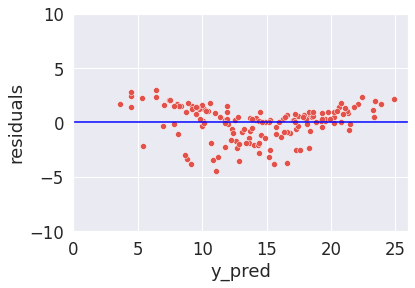

In [136]:
p=sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred')
plt.ylabel('residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p=sns.lineplot([0,26],[0,0],color='blue')



Goldfeld Quandt Test

In [137]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name=['F Statistic','p-value']
test=sms.het_goldfeldquandt(residuals,X_train)
lzip(name,test)

[('F Statistic', 1.1098849261262689), ('p-value', 0.3297188431941372)]

3)Check for Normality of error term/residuals

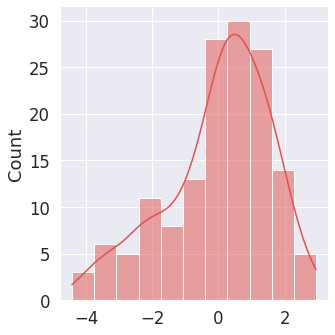

In [141]:
p=sns.displot(residuals,kde=True)

5) No Autocorrelation of Residuals

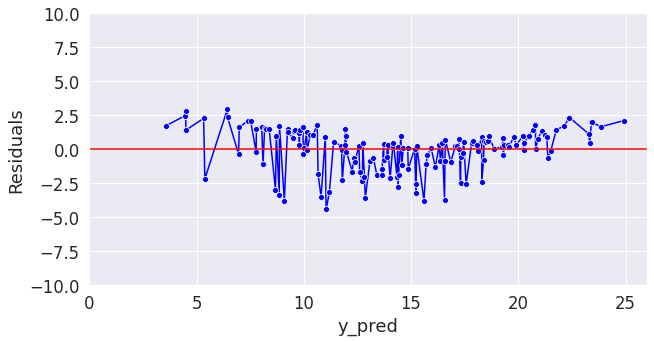

In [142]:
plt.figure(figsize=(10,5))
p=sns.lineplot(y_pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p=sns.lineplot([0,26],[0,0],color='red')


In [144]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals,lags=40,)[1])

0.008425577339963797

In [145]:
import statsmodels.api as sm

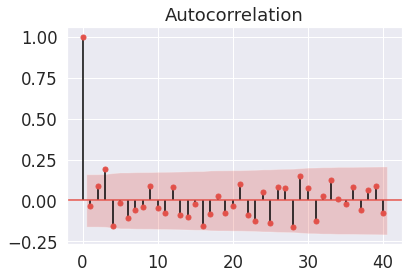

In [148]:
sm.graphics.tsa.plot_acf(residuals,lags=40)
plt.show()

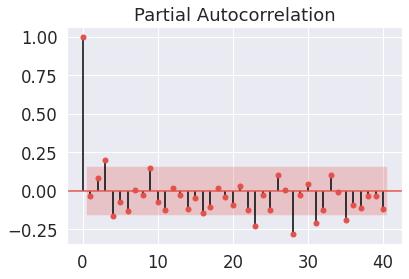

In [150]:
sm.graphics.tsa.plot_pacf(residuals,lags=40)
plt.show()

6) No perfect multicollinearity

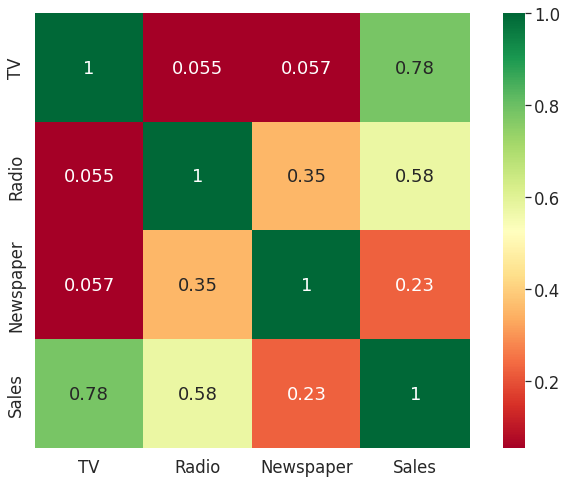

In [153]:
plt.figure(figsize=(12,8))
p=sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',square=True)

In [157]:
from sklearn.tree import DecisionTreeRegressor
dec_tree=DecisionTreeRegressor(random_state=0)
dec_tree.fit(X_train,y_train)
dec_tree_y_pred=dec_tree.predict(X_train)
print("Accurecy:{}".format(dec_tree.score(X_train,y_train)))
print('R 2 score:{}'.format(r2_score(y_true=y_train,y_pred=dec_tree_y_pred)))


Accurecy:1.0
R 2 score:1.0


In [160]:
from sklearn.ensemble import RandomForestRegressor
random=RandomForestRegressor(random_state=0)
random.fit(X_train,y_train)
random_pred=random.predict(X_train)
print('Accuracy:{}'.format(random.score(X_train,y_train)))
print('R2 Score:{}'.format(r2_score(y_true=y_train,y_pred=random_pred)))

Accuracy:0.9969123907528763
R2 Score:0.9969123907528763


In [162]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,y_train)
svr_pred=svr.predict(X_train)
print('Accuracy:{}'.format(svr.score(X_train,y_train)))
print('R2 Score:{}'.format(r2_score(y_true=y_train,y_pred=svr_pred)))


Accuracy:0.840786959997285
R2 Score:0.840786959997285
